<a href="https://www.kaggle.com/code/rajatraj0502/exploring-top-500-companies-in-bangalore-india?scriptVersionId=138669359" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-500-companies-in-bangalore-bengaluru-india/BangaloreTopCompanies.csv


In [2]:
import pandas as pd


# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/top-500-companies-in-bangalore-bengaluru-india/BangaloreTopCompanies.csv')

# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,CompanyName,Rating,Reviews,Salaries,Jobs,Location,Industry,Description
0,0,Accenture,4.1,1.5L,78.6T,27.3T,Bengaluru,Business Consulting,Growing customer expectations. Market-Shaping ...
1,1,Deloitte,4.1,1L,34T,35.3T,Bengaluru,Accounting & Tax,Deloitte provides industry-leading audit and a...
2,2,Cisco Systems,4.4,31.7T,8T,438,Bengaluru,Enterprise Software & Network Solutions,"#WeAreCisco, where each person is unique. We b..."
3,3,Dell Technologies,4.3,33.3T,9.9T,136,Bengaluru,Information Technology Support Services,We believe that each of us has the power to ma...
4,4,Microsoft,4.3,49.7T,9.9T,1.6T,Bengaluru,Computer Hardware Development,Our drive to change the world unites us! Micro...


In [3]:
# Function to convert Indian numbering system to integer
def convert_indian_numbering_system(value):
    if isinstance(value, str):
        if value.endswith('T'):
            return float(value[:-1]) * 10**3
        elif value.endswith('L'):
            return float(value[:-1]) * 10**5
    return value  # return the input as is if it's not a string

# Convert 'Reviews', 'Salaries', 'Jobs' columns to numeric again
df['Jobs'] = df['Jobs'].apply(convert_indian_numbering_system)

# Display the first few rows of the DataFrame after conversion
df.head()


,Unnamed: 0,CompanyName,Rating,Reviews,Salaries,Jobs,Location,Industry,Description
0,0,Accenture,4.1,1.5L,78.6T,27300.0,Bengaluru,Business Consulting,Growing customer expectations. Market-Shaping ...
1,1,Deloitte,4.1,1L,34T,35300.0,Bengaluru,Accounting & Tax,Deloitte provides industry-leading audit and a...
2,2,Cisco Systems,4.4,31.7T,8T,438,Bengaluru,Enterprise Software & Network Solutions,"#WeAreCisco, where each person is unique. We b..."
3,3,Dell Technologies,4.3,33.3T,9.9T,136,Bengaluru,Information Technology Support Services,We believe that each of us has the power to ma...
4,4,Microsoft,4.3,49.7T,9.9T,1600.0,Bengaluru,Computer Hardware Development,Our drive to change the world unites us! Micro...


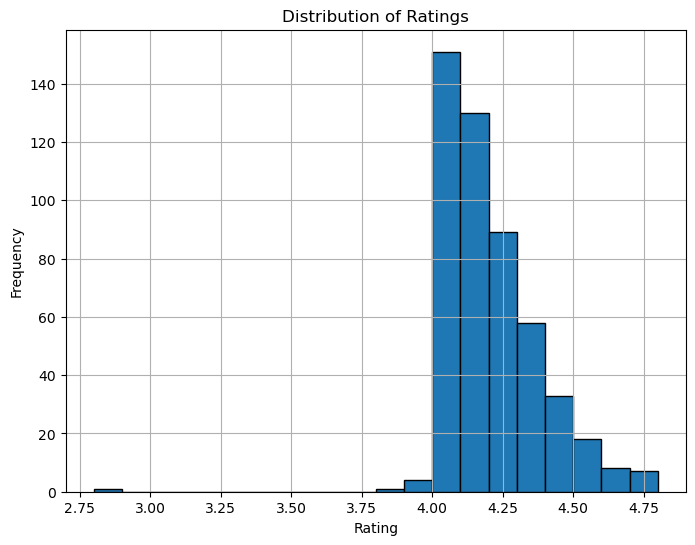

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of Ratings
plt.figure(figsize=(8,6))
plt.hist(df['Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [5]:
# Count the number of companies in each industry
industry_counts = df['Industry'].value_counts()

# Display the top 10 industries with the most companies
industry_counts.head(10)


Information Technology Support Services    69
Enterprise Software & Network Solutions    58
Computer Hardware Development              38
Internet & Web Services                    31
Business Consulting                        24
Electronics Manufacturing                  17
Investment & Asset Management              16
Biotech & Pharmaceuticals                  14
Consumer Product Manufacturing             14
Software Development                       12
Name: Industry, dtype: int64

In [6]:
# Convert 'Jobs' column to numeric and fill NaN values with 0
df['Jobs'] = pd.to_numeric(df['Jobs'], errors='coerce').fillna(0)

# Top 10 companies with the most job postings
top_companies_jobs = df.nlargest(10, 'Jobs')

# Display the top 10 companies
top_companies_jobs[['CompanyName', 'Jobs']]


,CompanyName,Jobs
199,Manpower,46900.0
1,Deloitte,35300.0
83,Marriott International,30100.0
0,Accenture,27300.0
17,Siemens,11300.0
177,Hilton,7300.0
156,PepsiCo,5800.0
16,JPMorgan Chase & Co,5500.0
107,Bosch,5500.0
45,Vodafone,4500.0


In [7]:
# Top 10 companies with the most job postings
top_companies_jobs = df.nlargest(10, 'Jobs')

In [8]:
# Count the number of companies with at least one job posting
companies_with_jobs = df[df['Jobs'] > 0].shape[0]

# Compute the proportion of companies with at least one job posting
proportion_with_jobs = companies_with_jobs / df.shape[0]

companies_with_jobs, proportion_with_jobs


(424, 0.848)

In [9]:
# Calculate the average rating
average_rating = df['Rating'].mean()

# Calculate the median rating
median_rating = df['Rating'].median()

# Calculate the standard deviation of ratings
std_dev_rating = df['Rating'].std()

average_rating, median_rating, std_dev_rating


(4.1572, 4.1, 0.17785225004393787)

In [10]:
# Companies with the highest ratings
highest_ratings = df.nlargest(5, 'Rating')

# Companies with the lowest ratings
lowest_ratings = df.nsmallest(5, 'Rating')

highest_ratings[['CompanyName', 'Rating']], lowest_ratings[['CompanyName', 'Rating']]


(                      CompanyName  Rating
 312  Aurigo Software Technologies     4.8
 476                         Calix     4.8
 497                 Atlas Systems     4.8
 47                         Akamai     4.7
 356                    iEnergizer     4.7,
         CompanyName  Rating
 183          Amelia     2.8
 125         Parexel     3.8
 21   Morgan Stanley     3.9
 166         Softtek     3.9
 296             RSM     3.9)

In [11]:
# Calculate the total number of job postings
total_jobs = df['Jobs'].sum()

# Calculate the total number of reviews
total_reviews = df['Reviews'].sum()

# Calculate the total number of salary reports
total_salaries = df['Salaries'].sum()

total_jobs, total_reviews, total_salaries


(389109.0,
 '1.5L1L31.7T33.3T49.7T45.8T29.3T28.4T11.1T20.4T23.5T16.9T9.8T30.4T17.8T15.2T23.5T20.4T10.9T12.9T14.9T17.7T18.3T49.8T13.9T5T8.9T13.2T9.3T17.3T10T9T4.4T14.8T7.2T5.1T6T2.9T15.1T5T38.8T5.2T16T4.1T4.9T16.3T6.6T2.9T3.3T10.1T4.9T15.4T12T3.4T4.3T10.5T3.8T2.7T3.8T7.7T1.9T6.1T2T5.9T7.7T2.9T1.7T5.9T1.8T12.2T4T7T8.6T2.3T7.8T4.3T2.3T1.5T1.9T10.9T8467.1T7.1T16.9T8.9T5.8T4.9T3.3T3.5T38.5T2.3T2.7T5.5T1.8T2.2T4.5T2.2T1.6T6.4T1.3T2.3T3.7T4.2T13.9T3.5T2.5T2.6T2.6T2.2T4.3T1.9T3.6T1.5T3.4T6.7T2.4T17.9T3.9T4.1T2.6T2T3.8T8095.5T4.1T3.3T4.4T4.6T1.3T3.8T1.3T2.5T1.2T3.3T3.6T15.1T1.8T2.6T7633.3T2.8T7T8821.1T1.9T1.7T1.8T2.8T1.3T1.2T8.3T10.7T3.8T4.2T2.2T90818.9T1.9T1.8T8602T18.6T8696.9T2.9T4.8T2.9T9.6T2.7T2.7T16T1.4T6.3T1.5T7531.3T3.7T10.5T3.8T8218003.5T3.3T9701.5T1.5T84214.3T8307961.5T7.5T9091.7T1T4.7T1.4T7682T8.5T13T6.5T12T7722T3.8T9881.6T7341.2T7761.8T6097.1T1.4T4808939651.4T2.2T6.9T9151.3T6041.2T2.2T1.4T4.9T1.5T7323T1.2T1.3T8.4T7825035001.6T5284.1T1.6T8451.4T5592.2T7231.1T6373321.1T2.7T3.5T4141T1.2

In [12]:
# Convert 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Salaries' column to numeric
df['Salaries'] = pd.to_numeric(df['Salaries'], errors='coerce')

# Find the company with the most reviews
most_reviews = df.nlargest(1, 'Reviews')[['CompanyName', 'Reviews']]

# Find the company with the most salary reports
most_salaries = df.nlargest(1, 'Salaries')[['CompanyName', 'Salaries']]

most_reviews, most_salaries


(          CompanyName  Reviews
 267  Extreme Networks    993.0,
              CompanyName  Salaries
 433  Hindustan Petroleum     993.0)

In [13]:
# Find the company with the most reviews
most_reviews = df.nlargest(1, 'Reviews')

# Find the company with the most salary reports
most_salaries = df.nlargest(1, 'Salaries')

most_reviews[['CompanyName', 'Reviews']], most_salaries[['CompanyName', 'Salaries']]


(          CompanyName  Reviews
 267  Extreme Networks    993.0,
              CompanyName  Salaries
 433  Hindustan Petroleum     993.0)

In [14]:
# Analyzing the correlation between different numeric columns
correlation_matrix = df[['Rating', 'Reviews', 'Salaries', 'Jobs']].corr()

correlation_matrix


,Rating,Reviews,Salaries,Jobs
Rating,1.000000,-0.098979,-0.070880,-0.054261
Reviews,-0.098979,1.000000,0.362811,0.216765
Salaries,-0.070880,0.362811,1.000000,0.055288
Jobs,-0.054261,0.216765,0.055288,1.000000


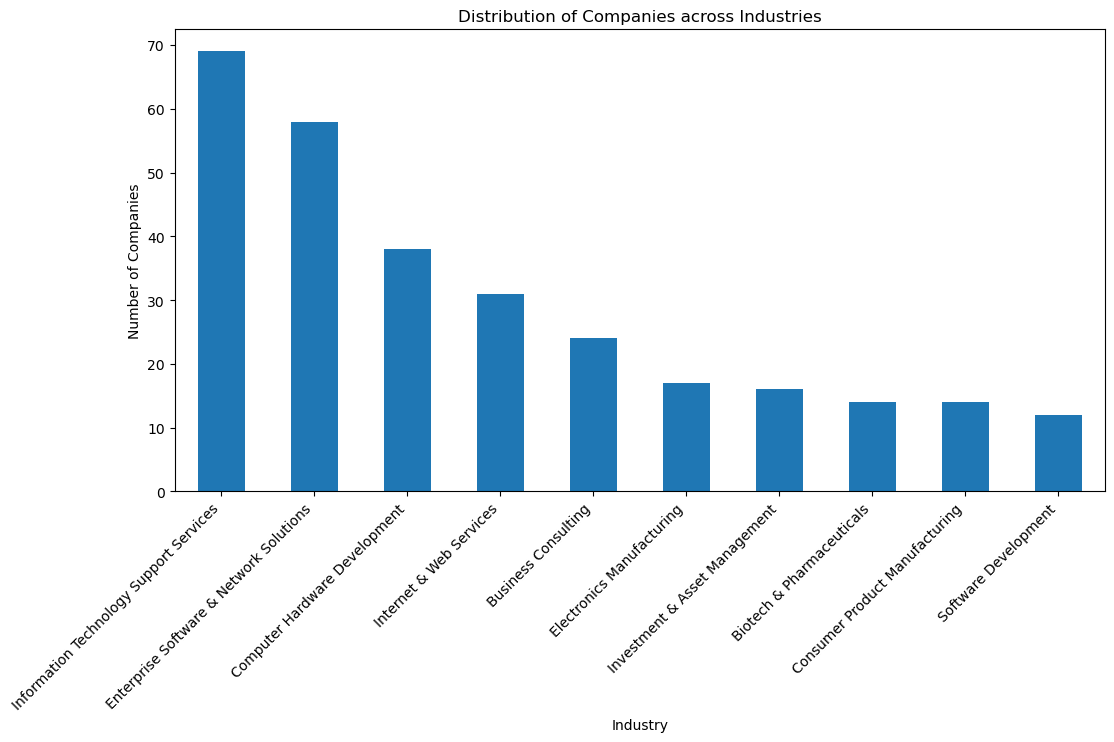

In [15]:
# Analyzing the distribution of companies across different industries
industry_distribution = df['Industry'].value_counts()

# Display the top 10 industries with the most companies
industry_distribution.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Distribution of Companies across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [16]:
# Find the company with the highest and lowest number of job postings
most_jobs = df.nlargest(1, 'Jobs')
least_jobs = df.nsmallest(1, 'Jobs')

most_jobs[['CompanyName', 'Jobs']], least_jobs[['CompanyName', 'Jobs']]


(    CompanyName     Jobs
 199    Manpower  46900.0,
   CompanyName  Jobs
 8    Mindtree   0.0)

In [17]:
# Compute the average number of job postings
average_jobs = df['Jobs'].mean()

# Compute the median number of job postings
median_jobs = df['Jobs'].median()

average_jobs, median_jobs


(778.218, 79.5)

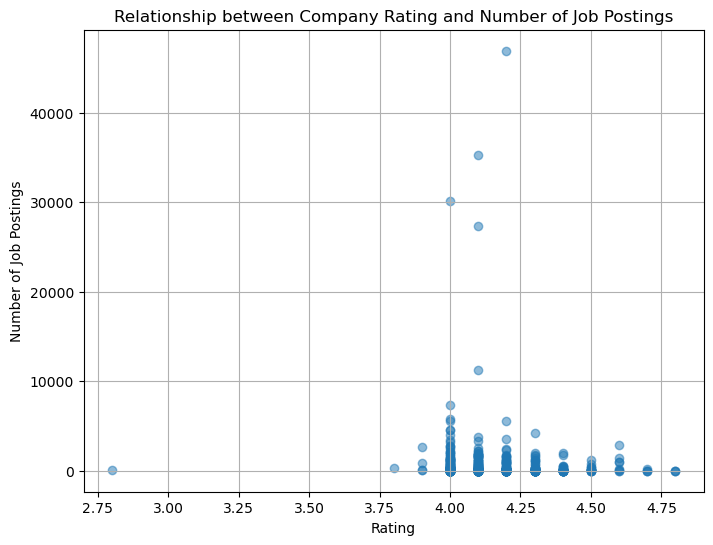

In [18]:
# Analyze the relationship between the number of job postings and the rating
plt.figure(figsize=(8,6))
plt.scatter(df['Rating'], df['Jobs'], alpha=0.5)
plt.title('Relationship between Company Rating and Number of Job Postings')
plt.xlabel('Rating')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()


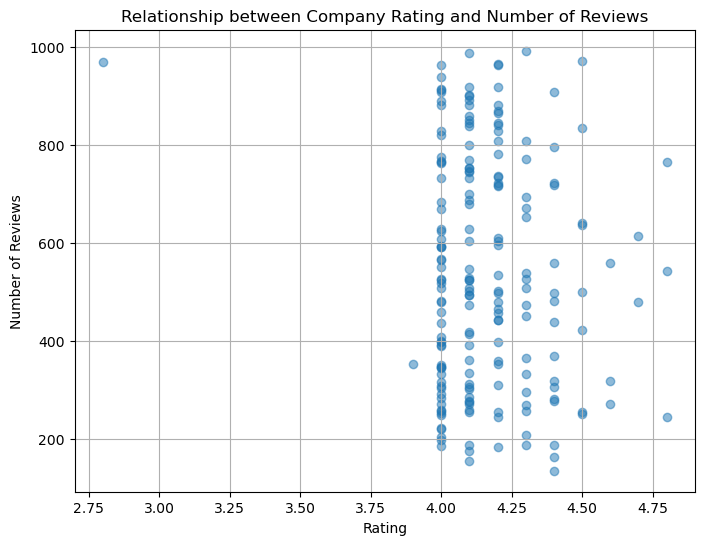

In [19]:
# Analyze the relationship between the number of reviews and the rating
plt.figure(figsize=(8,6))
plt.scatter(df['Rating'], df['Reviews'], alpha=0.5)
plt.title('Relationship between Company Rating and Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


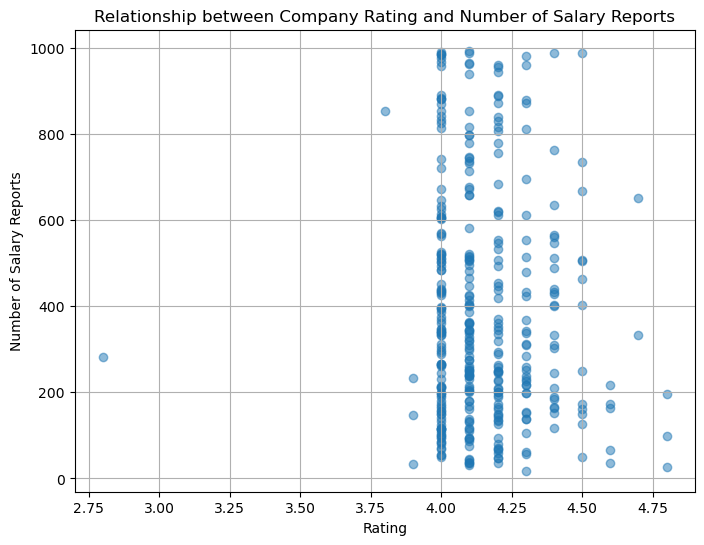

In [20]:
# Analyze the relationship between the number of salary reports and the rating
plt.figure(figsize=(8,6))
plt.scatter(df['Rating'], df['Salaries'], alpha=0.5)
plt.title('Relationship between Company Rating and Number of Salary Reports')
plt.xlabel('Rating')
plt.ylabel('Number of Salary Reports')
plt.grid(True)
plt.show()


In [21]:
# Find the company with the highest and lowest number of reviews
most_reviews = df.nlargest(1, 'Reviews')
least_reviews = df.nsmallest(1, 'Reviews')

# Find the company with the highest and lowest number of salary reports
most_salaries = df.nlargest(1, 'Salaries')
least_salaries = df.nsmallest(1, 'Salaries')

most_reviews[['CompanyName', 'Reviews']], least_reviews[['CompanyName', 'Reviews']], most_salaries[['CompanyName', 'Salaries']], least_salaries[['CompanyName', 'Salaries']]


(          CompanyName  Reviews
 267  Extreme Networks    993.0,
     CompanyName  Reviews
 425   Thorogood    135.0,
              CompanyName  Salaries
 433  Hindustan Petroleum     993.0,
     CompanyName  Salaries
 382   lululemon      18.0)

In [22]:
# Compute the average number of reviews and salary reports
average_reviews = df['Reviews'].mean()
average_salaries = df['Salaries'].mean()

# Compute the median number of reviews and salary reports
median_reviews = df['Reviews'].median()
median_salaries = df['Salaries'].median()

average_reviews, median_reviews, average_salaries, median_salaries


(540.6666666666666, 514.0, 386.8230337078652, 330.5)

In [23]:
# Top 10 companies with the most reviews
top_companies_reviews = df.nlargest(10, 'Reviews')

# Display the top 10 companies
top_companies_reviews[['CompanyName', 'Reviews']]


,CompanyName,Reviews
267,Extreme Networks,993.0
206,FireEye,988.0
366,Databricks,971.0
183,Amelia,970.0
217,Cuelearn,965.0
286,Ansys,963.0
427,Grant Thornton International,963.0
426,Max Life Insurance,940.0
405,North American Corporation,919.0
433,Hindustan Petroleum,918.0


In [24]:
# Top 10 companies with the most salary reports
top_companies_salaries = df.nlargest(10, 'Salaries')

# Display the top 10 companies
top_companies_salaries[['CompanyName', 'Salaries']]


,CompanyName,Salaries
433,Hindustan Petroleum,993.0
106,Broadridge,989.0
66,Manhattan Associates,988.0
143,Indian Institute of Science,988.0
117,ServiceNow,987.0
110,Apexon,985.0
127,Infor,985.0
300,BlackRock,984.0
175,Shadowfax Technologies,980.0
254,Lenskart Solutions,977.0


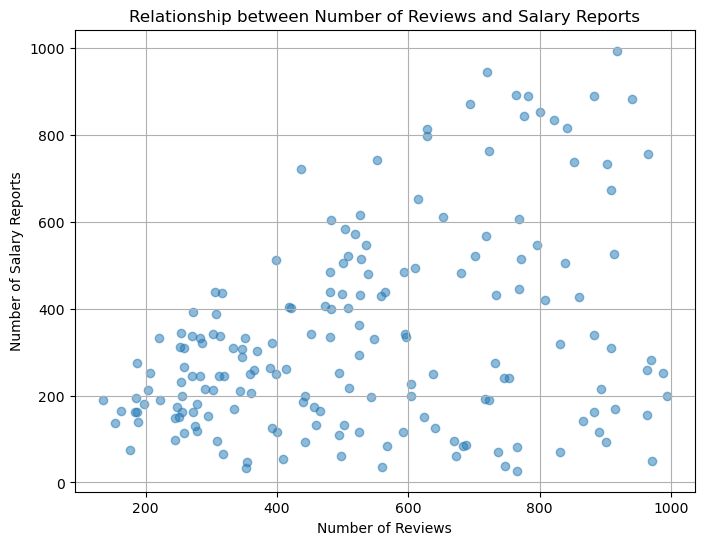

In [25]:
# Analyze the relationship between the number of reviews and salary reports
plt.figure(figsize=(8,6))
plt.scatter(df['Reviews'], df['Salaries'], alpha=0.5)
plt.title('Relationship between Number of Reviews and Salary Reports')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Salary Reports')
plt.grid(True)
plt.show()


In [26]:
# Compute the average, median, and standard deviation of the number of job postings
average_jobs = df['Jobs'].mean()
median_jobs = df['Jobs'].median()
std_dev_jobs = df['Jobs'].std()

# Compute the average, median, and standard deviation of the number of reviews
average_reviews = df['Reviews'].mean()
median_reviews = df['Reviews'].median()
std_dev_reviews = df['Reviews'].std()

# Compute the average, median, and standard deviation of the number of salary reports
average_salaries = df['Salaries'].mean()
median_salaries = df['Salaries'].median()
std_dev_salaries = df['Salaries'].std()

average_jobs, median_jobs, std_dev_jobs, average_reviews, median_reviews, std_dev_reviews, average_salaries, median_salaries, std_dev_salaries


(778.218,
 79.5,
 3303.413864594867,
 540.6666666666666,
 514.0,
 235.33258927350252,
 386.8230337078652,
 330.5,
 264.20742945233945)

In [27]:
# Top 5 companies with the highest ratings in each industry
top_companies_in_each_industry = df.groupby('Industry').apply(lambda x: x.nlargest(5, 'Rating')).reset_index(drop=True)

# Display the top companies in each industry
top_companies_in_each_industry[['Industry', 'CompanyName', 'Rating']]


,Industry,CompanyName,Rating
0,Accounting & Tax,Deloitte,4.1
1,Accounting & Tax,Grant Thornton International,4.0
2,Accounting & Tax,RSM,3.9
3,Advertising & Public Relations,Self Opportunity,4.3
4,Advertising & Public Relations,North American Corporation,4.2
...,...,...,...
172,Transportation Equipment Manufacturing,Scania Group,4.1
173,Video Game Publishing,Zynga,4.5
174,Video Game Publishing,Rockstar Games,4.3
175,Video Game Publishing,Mobile Premier League,4.0


In [28]:
# Top 10 companies with the highest number of reviews, salary reports, and job postings
top_companies_reviews = df.nlargest(10, 'Reviews')
top_companies_salaries = df.nlargest(10, 'Salaries')
top_companies_jobs = df.nlargest(10, 'Jobs')

top_companies_reviews[['CompanyName', 'Reviews']], top_companies_salaries[['CompanyName', 'Salaries']], top_companies_jobs[['CompanyName', 'Jobs']]


(                      CompanyName  Reviews
 267              Extreme Networks    993.0
 206                       FireEye    988.0
 366                    Databricks    971.0
 183                        Amelia    970.0
 217                      Cuelearn    965.0
 286                         Ansys    963.0
 427  Grant Thornton International    963.0
 426            Max Life Insurance    940.0
 405    North American Corporation    919.0
 433           Hindustan Petroleum    918.0,
                      CompanyName  Salaries
 433          Hindustan Petroleum     993.0
 106                   Broadridge     989.0
 66          Manhattan Associates     988.0
 143  Indian Institute of Science     988.0
 117                   ServiceNow     987.0
 110                       Apexon     985.0
 127                        Infor     985.0
 300                    BlackRock     984.0
 175       Shadowfax Technologies     980.0
 254           Lenskart Solutions     977.0,
                 CompanyName  

In [29]:
# Top 5 companies with the lowest ratings in each industry
lowest_companies_in_each_industry = df.groupby('Industry').apply(lambda x: x.nsmallest(5, 'Rating')).reset_index(drop=True)

# Display the lowest rated companies in each industry
lowest_companies_in_each_industry[['Industry', 'CompanyName', 'Rating']]


,Industry,CompanyName,Rating
0,Accounting & Tax,RSM,3.9
1,Accounting & Tax,Grant Thornton International,4.0
2,Accounting & Tax,Deloitte,4.1
3,Advertising & Public Relations,Hibu,4.0
4,Advertising & Public Relations,Valtech,4.1
...,...,...,...
172,Transportation Equipment Manufacturing,Vitesco Technologies,4.0
173,Video Game Publishing,Mobile Premier League,4.0
174,Video Game Publishing,Rockstar Games,4.3
175,Video Game Publishing,Zynga,4.5


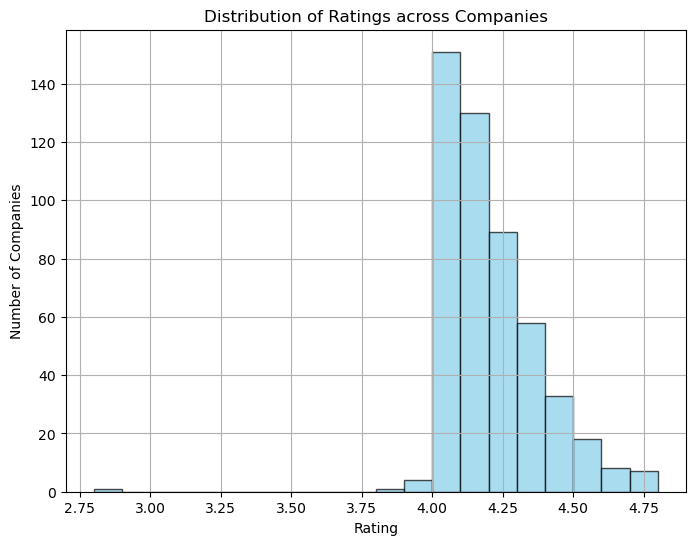

In [30]:
# Plotting the distribution of ratings across companies
plt.figure(figsize=(8,6))
plt.hist(df['Rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings across Companies')
plt.xlabel('Rating')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


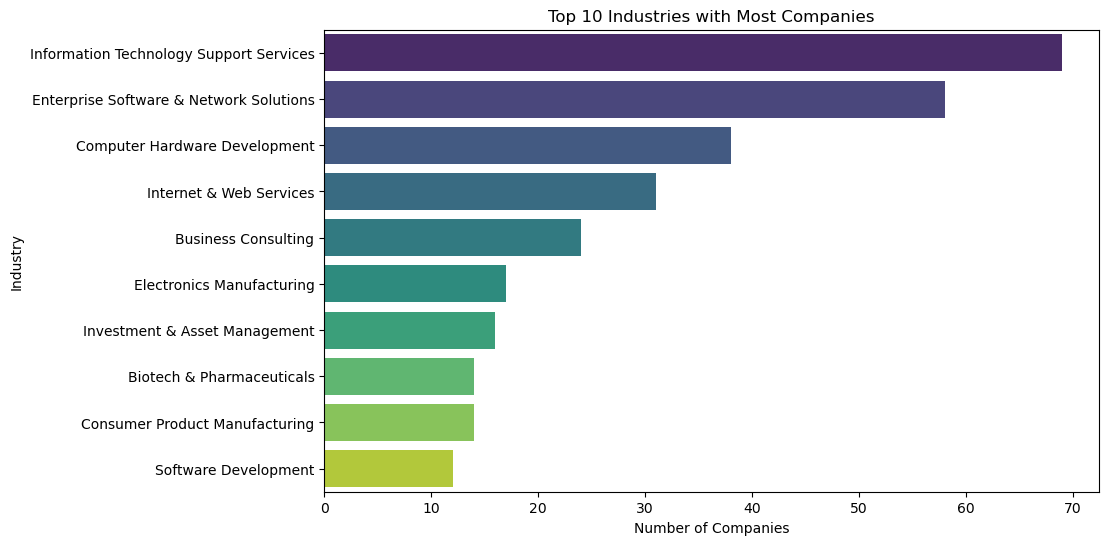

In [31]:
# Plotting the top 10 industries with the most companies
top_10_industries = df['Industry'].value_counts().head(10)

# Import seaborn library
import seaborn as sns

# Plotting the top 10 industries with the most companies
plt.figure(figsize=(10,6))
sns.barplot(y=top_10_industries.index, x=top_10_industries.values, palette='viridis')
plt.title('Top 10 Industries with Most Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()


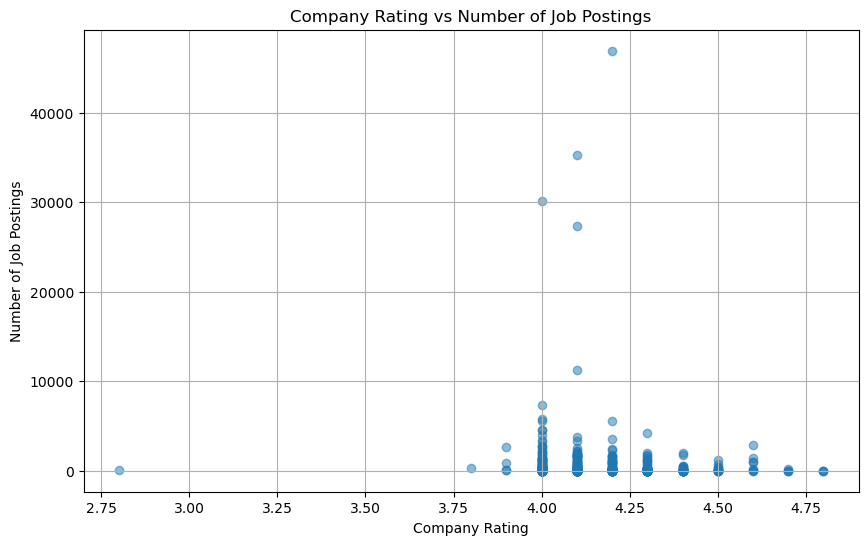

In [32]:
# Scatter plot of ratings vs number of job postings
plt.figure(figsize=(10,6))
plt.scatter(df['Rating'], df['Jobs'], alpha=0.5)
plt.title('Company Rating vs Number of Job Postings')
plt.xlabel('Company Rating')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()


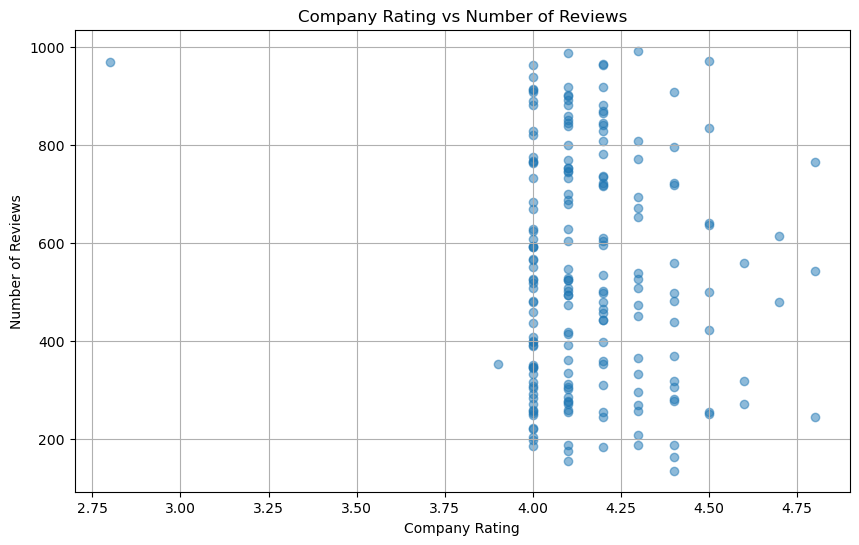

In [33]:
# Scatter plot of ratings vs number of reviews
plt.figure(figsize=(10,6))
plt.scatter(df['Rating'], df['Reviews'], alpha=0.5)
plt.title('Company Rating vs Number of Reviews')
plt.xlabel('Company Rating')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


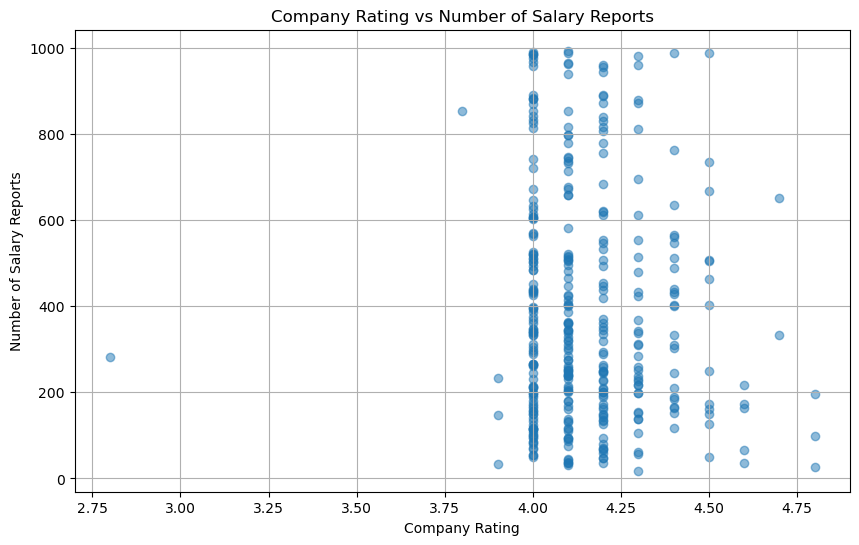

In [34]:
# Scatter plot of ratings vs number of salary reports
plt.figure(figsize=(10,6))
plt.scatter(df['Rating'], df['Salaries'], alpha=0.5)
plt.title('Company Rating vs Number of Salary Reports')
plt.xlabel('Company Rating')
plt.ylabel('Number of Salary Reports')
plt.grid(True)
plt.show()


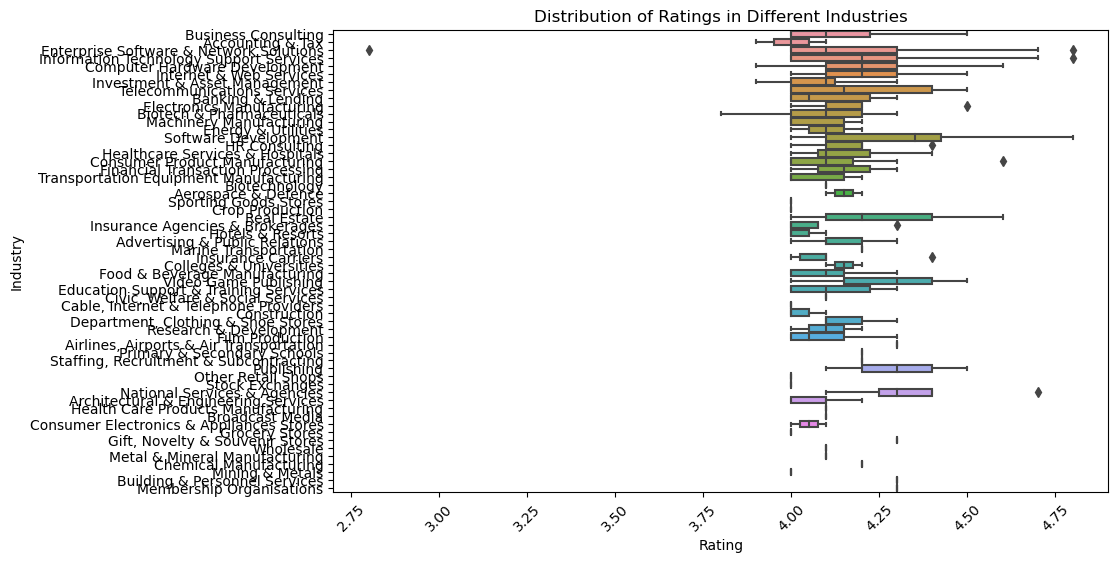

In [35]:
# Analyzing the distribution of ratings in different industries
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rating'], y=df['Industry'])
plt.title('Distribution of Ratings in Different Industries')
plt.xlabel('Rating')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.show()


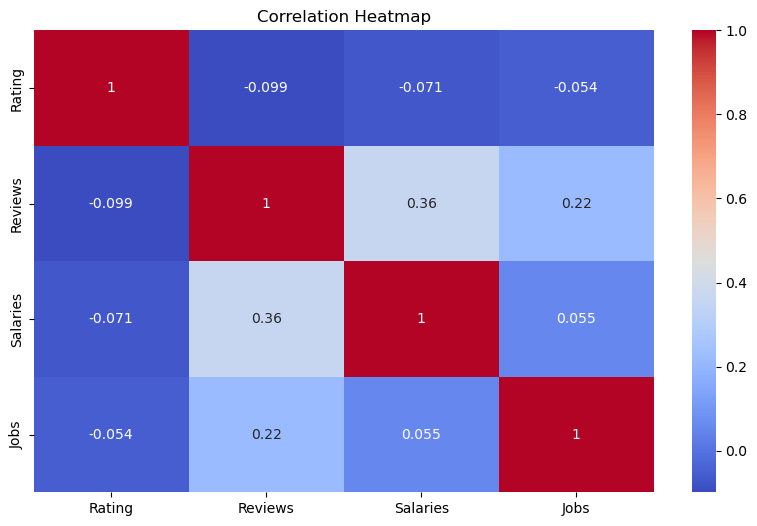

In [36]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df[['Rating', 'Reviews', 'Salaries', 'Jobs']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


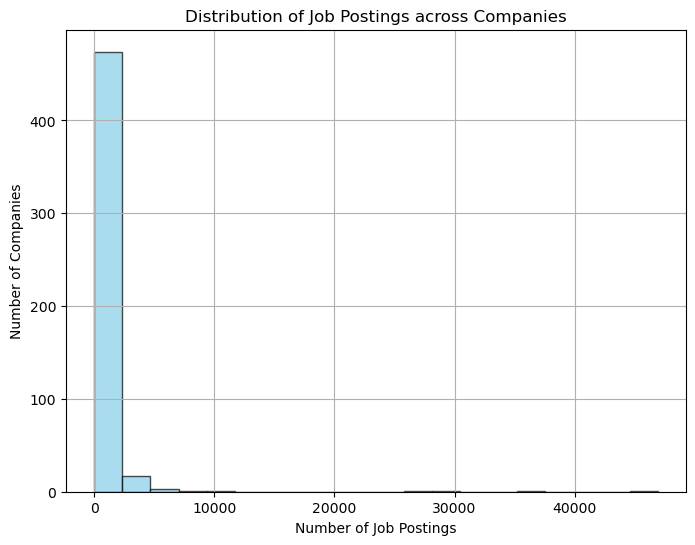

In [37]:
# Plotting the distribution of jobs across companies
plt.figure(figsize=(8,6))
plt.hist(df['Jobs'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Job Postings across Companies')
plt.xlabel('Number of Job Postings')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()


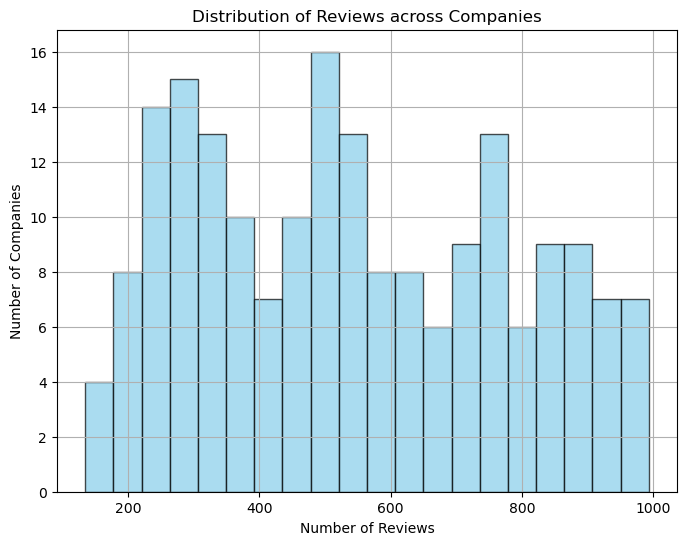

In [38]:
# Plotting the distribution of reviews across companies
plt.figure(figsize=(8,6))
plt.hist(df['Reviews'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews across Companies')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()


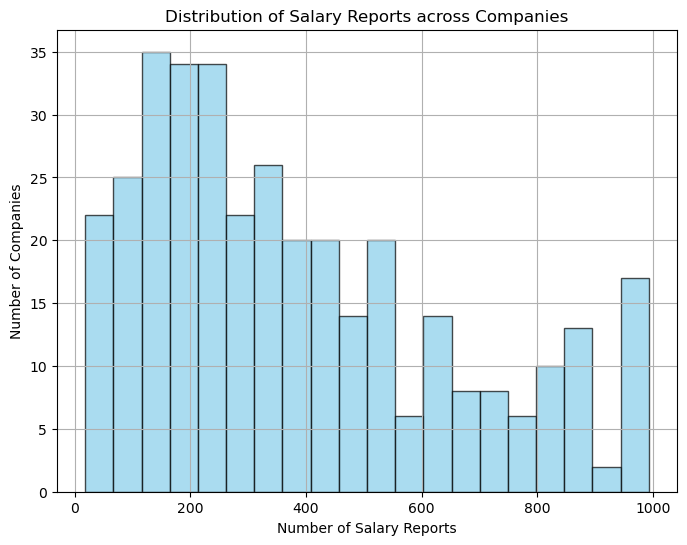

In [39]:
# Plotting the distribution of salary reports across companies
plt.figure(figsize=(8,6))
plt.hist(df['Salaries'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary Reports across Companies')
plt.xlabel('Number of Salary Reports')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()


In [40]:
# Top 5 companies with the most job postings in each industry
top_companies_jobs_in_each_industry = df.groupby('Industry').apply(lambda x: x.nlargest(5, 'Jobs')).reset_index(drop=True)

# Display the top companies with most job postings in each industry
top_companies_jobs_in_each_industry[['Industry', 'CompanyName', 'Jobs']]


,Industry,CompanyName,Jobs
0,Accounting & Tax,Deloitte,35300.0
1,Accounting & Tax,RSM,2600.0
2,Accounting & Tax,Grant Thornton International,141.0
3,Advertising & Public Relations,Hibu,277.0
4,Advertising & Public Relations,North American Corporation,9.0
...,...,...,...
172,Transportation Equipment Manufacturing,Scania Group,818.0
173,Video Game Publishing,Rockstar Games,155.0
174,Video Game Publishing,Zynga,91.0
175,Video Game Publishing,Mobile Premier League,0.0


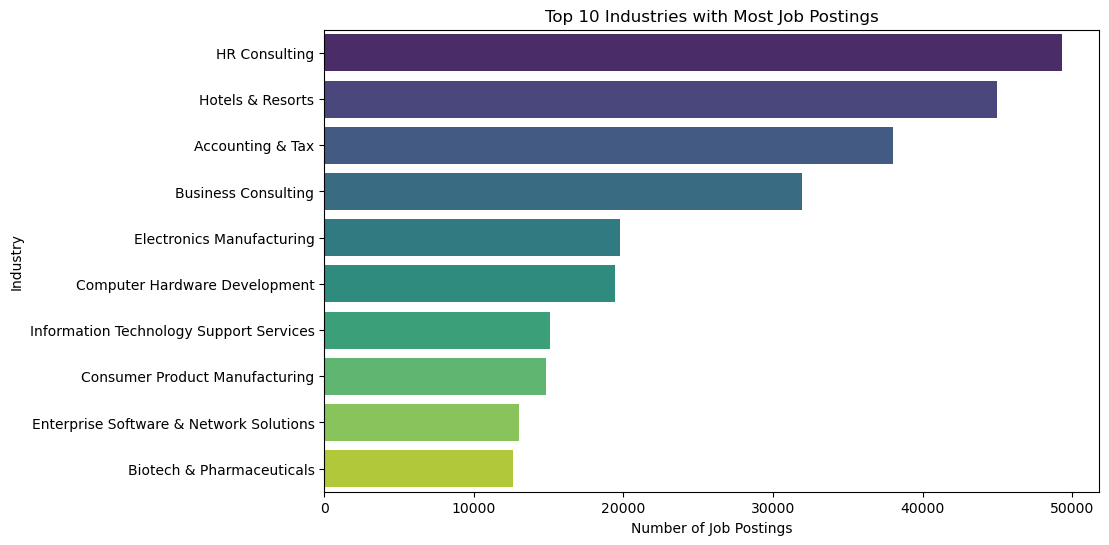

In [41]:
# Top 10 industries with the most job postings
top_industries_jobs = df.groupby('Industry')['Jobs'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_industries_jobs.index, x=top_industries_jobs.values, palette='viridis')
plt.title('Top 10 Industries with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Industry')
plt.show()


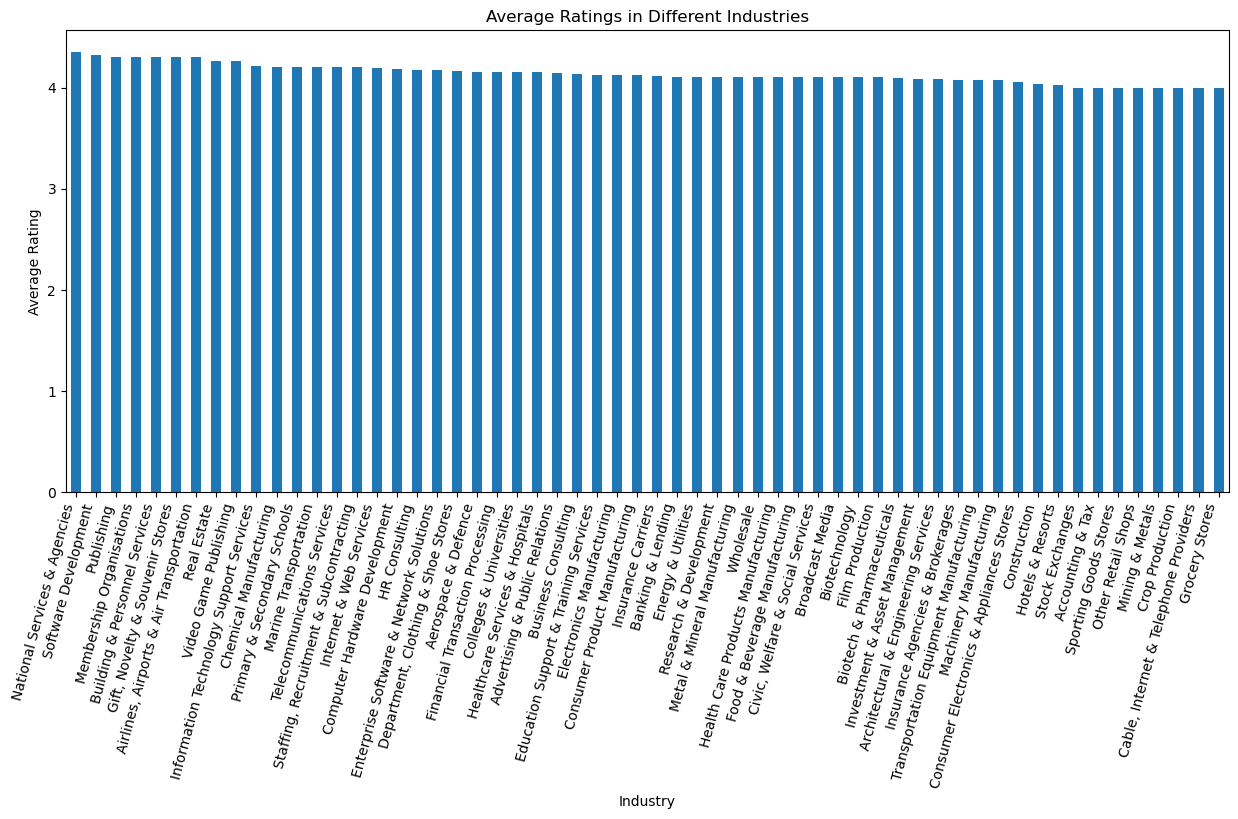

In [42]:
# Compute the average rating in each industry
average_ratings_per_industry = df.groupby('Industry')['Rating'].mean().sort_values(ascending=False)

# Display the industries with their average ratings
average_ratings_per_industry.plot(kind='bar', figsize=(15,6))
plt.title('Average Ratings in Different Industries')
plt.xlabel('Industry')
plt.ylabel('Average Rating')
plt.xticks(rotation=75, ha='right')
plt.show()


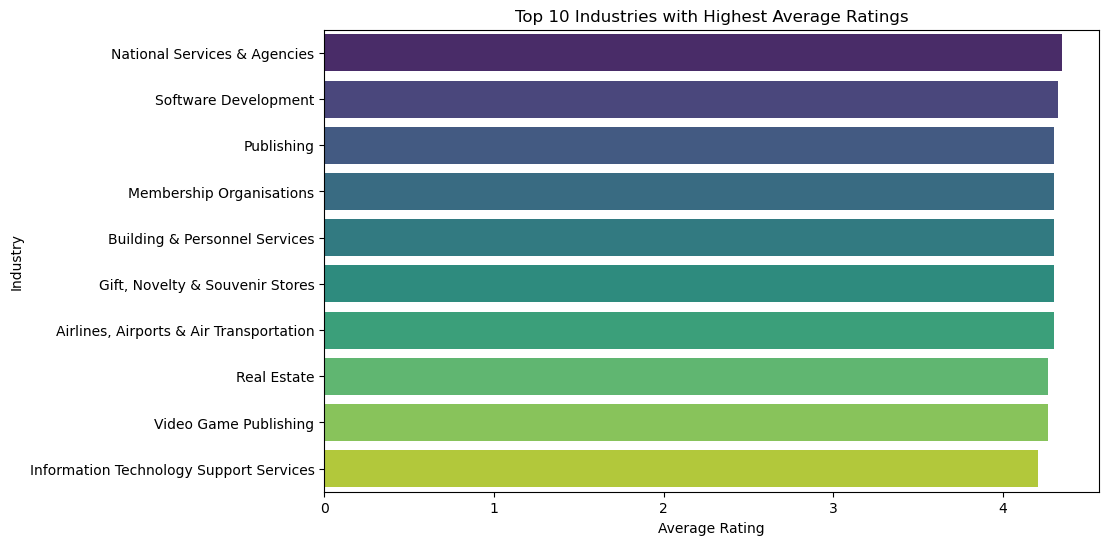

In [43]:
# Plotting the top 10 industries with the highest average ratings
top_10_industries_by_rating = average_ratings_per_industry.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_industries_by_rating.values, y=top_10_industries_by_rating.index, palette='viridis')
plt.title('Top 10 Industries with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Industry')
plt.show()


In [44]:
# Top 5 companies with the most reviews in each industry
top_companies_reviews_in_each_industry = df.groupby('Industry').apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)

# Display the top companies with most reviews in each industry
top_companies_reviews_in_each_industry[['Industry', 'CompanyName', 'Reviews']]


,Industry,CompanyName,Reviews
0,Accounting & Tax,Grant Thornton International,963.0
1,Accounting & Tax,Deloitte,NaN
2,Accounting & Tax,RSM,NaN
3,Advertising & Public Relations,North American Corporation,919.0
4,Advertising & Public Relations,Valtech,893.0
...,...,...,...
172,Transportation Equipment Manufacturing,Tata Motors,NaN
173,Video Game Publishing,Rockstar Games,509.0
174,Video Game Publishing,Mobile Premier League,272.0
175,Video Game Publishing,Zynga,NaN


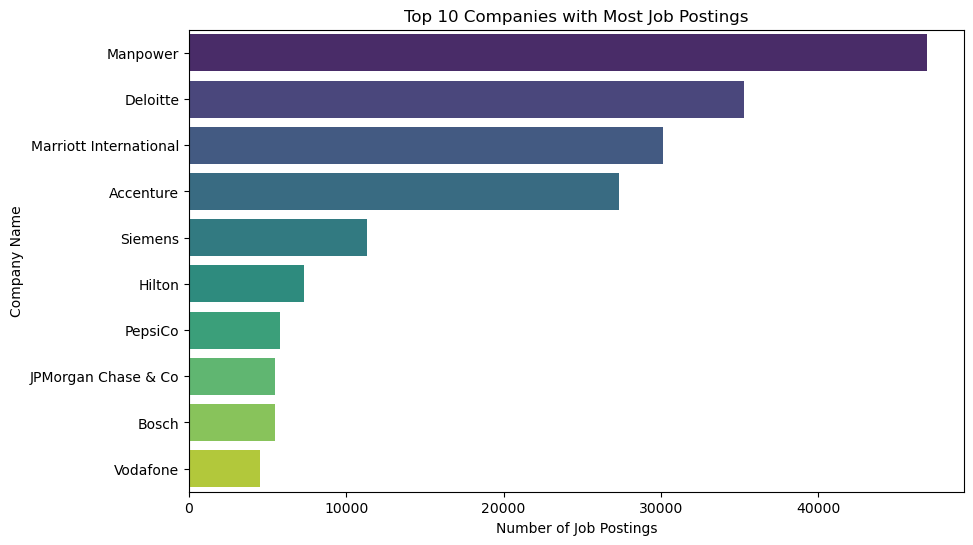

In [45]:
# Top 10 companies with the most job postings
top_10_companies_jobs = df.nlargest(10, 'Jobs')

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_companies_jobs['Jobs'], y=top_10_companies_jobs['CompanyName'], palette='viridis')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.show()


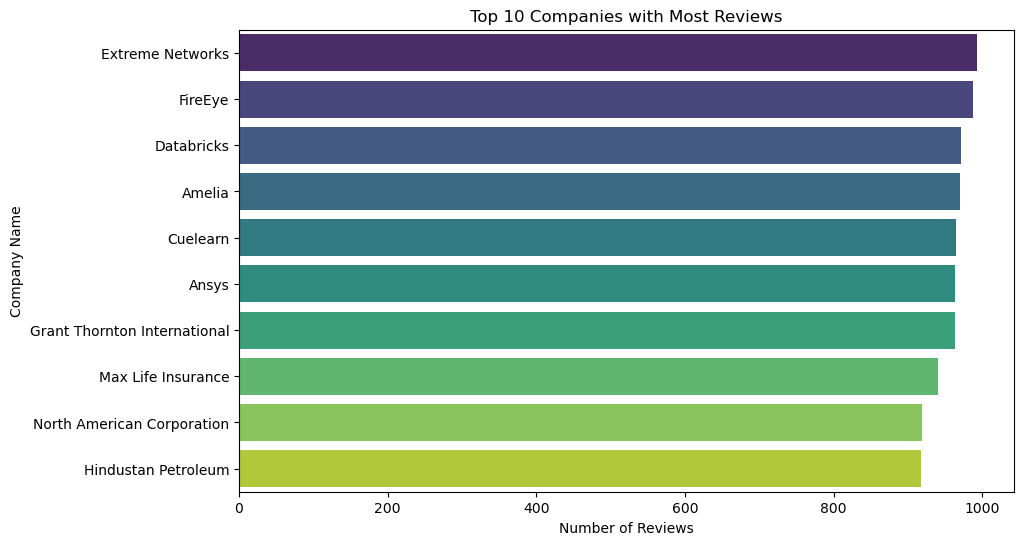

In [46]:
# Top 10 companies with the most reviews
top_10_companies_reviews = df.nlargest(10, 'Reviews')

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_companies_reviews['Reviews'], y=top_10_companies_reviews['CompanyName'], palette='viridis')
plt.title('Top 10 Companies with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Company Name')
plt.show()


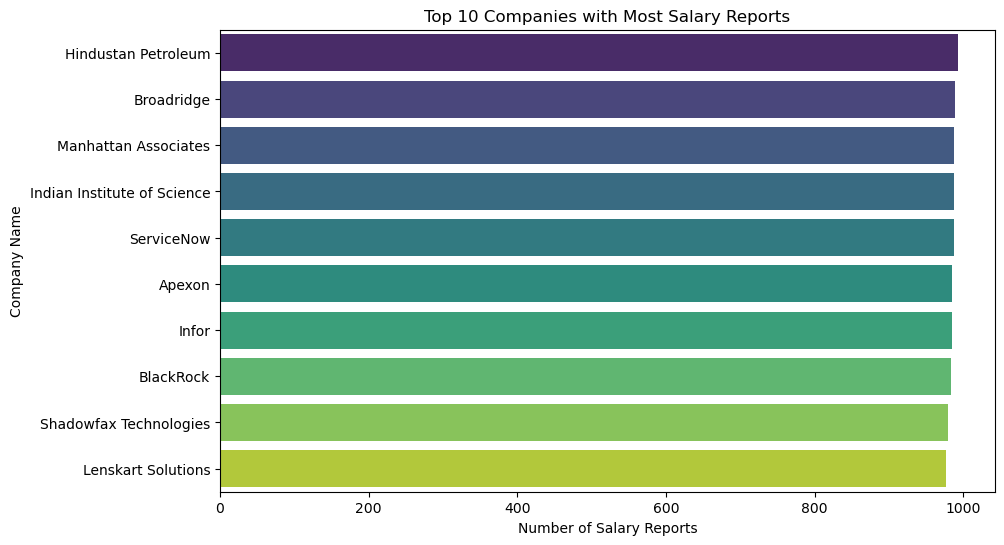

In [47]:
# Top 10 companies with the most salary reports
top_10_companies_salaries = df.nlargest(10, 'Salaries')

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_companies_salaries['Salaries'], y=top_10_companies_salaries['CompanyName'], palette='viridis')
plt.title('Top 10 Companies with Most Salary Reports')
plt.xlabel('Number of Salary Reports')
plt.ylabel('Company Name')
plt.show()


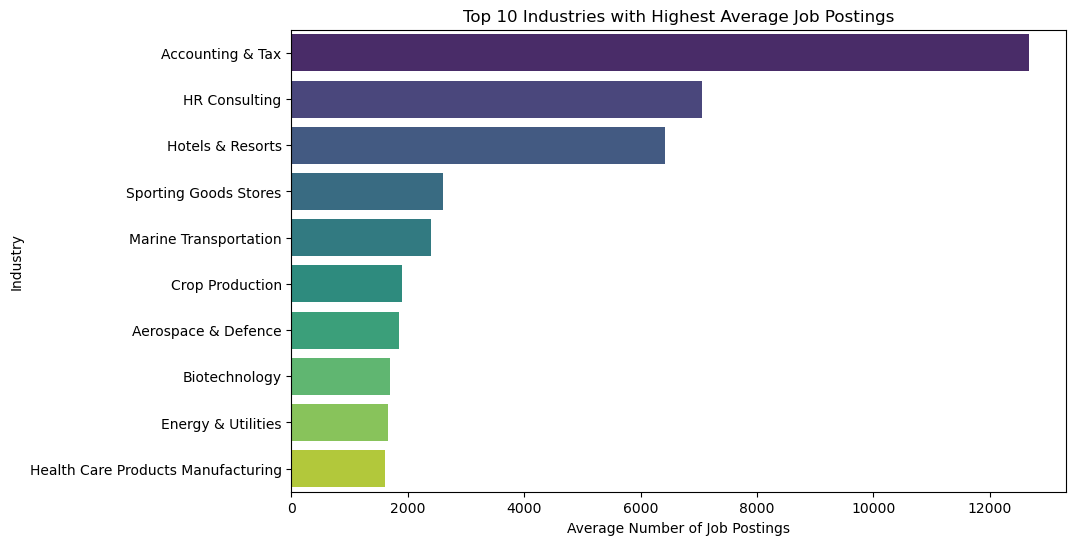

In [48]:
# Compute the average number of job postings in each industry
average_jobs_per_industry = df.groupby('Industry')['Jobs'].mean().sort_values(ascending=False)

# Plotting the top 10 industries with the highest average job postings
top_10_industries_by_jobs = average_jobs_per_industry.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_industries_by_jobs.values, y=top_10_industries_by_jobs.index, palette='viridis')
plt.title('Top 10 Industries with Highest Average Job Postings')
plt.xlabel('Average Number of Job Postings')
plt.ylabel('Industry')
plt.show()


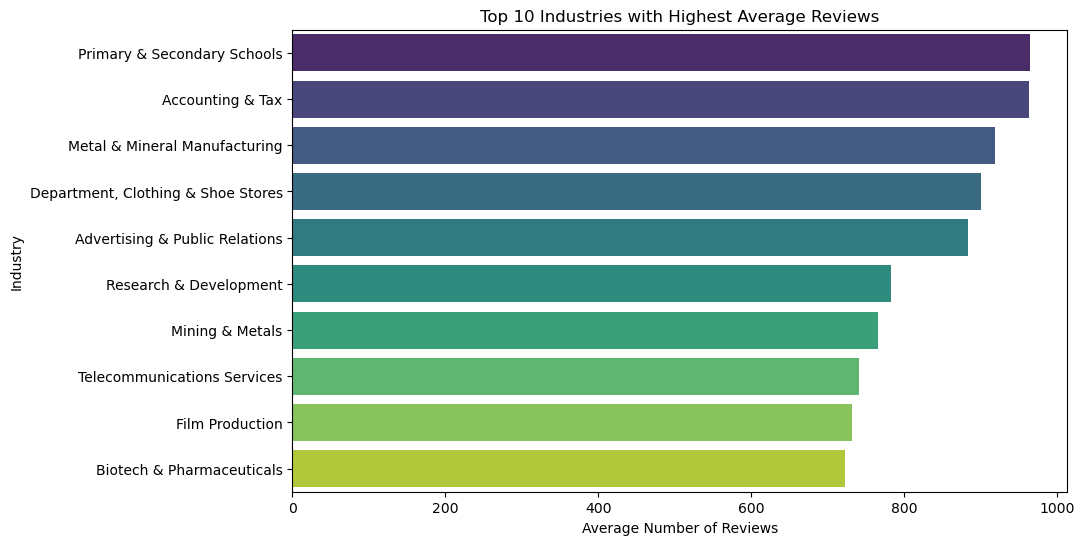

In [49]:
# Compute the average number of reviews in each industry
average_reviews_per_industry = df.groupby('Industry')['Reviews'].mean().sort_values(ascending=False)

# Plotting the top 10 industries with the highest average reviews
top_10_industries_by_reviews = average_reviews_per_industry.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_industries_by_reviews.values, y=top_10_industries_by_reviews.index, palette='viridis')
plt.title('Top 10 Industries with Highest Average Reviews')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Industry')
plt.show()


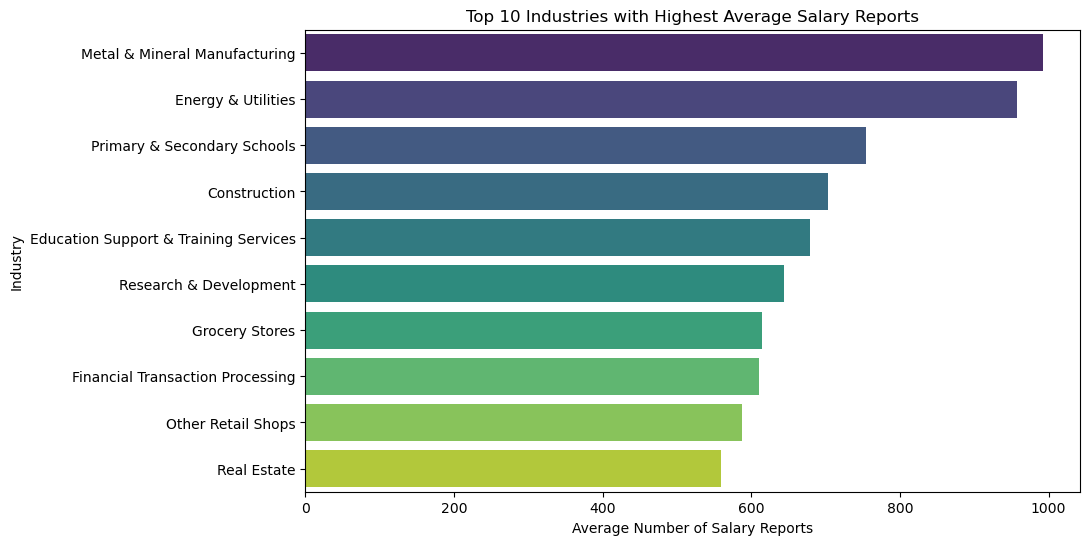

In [50]:
# Compute the average number of salary reports in each industry
average_salaries_per_industry = df.groupby('Industry')['Salaries'].mean().sort_values(ascending=False)

# Plotting the top 10 industries with the highest average salary reports
top_10_industries_by_salaries = average_salaries_per_industry.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_industries_by_salaries.values, y=top_10_industries_by_salaries.index, palette='viridis')
plt.title('Top 10 Industries with Highest Average Salary Reports')
plt.xlabel('Average Number of Salary Reports')
plt.ylabel('Industry')
plt.show()


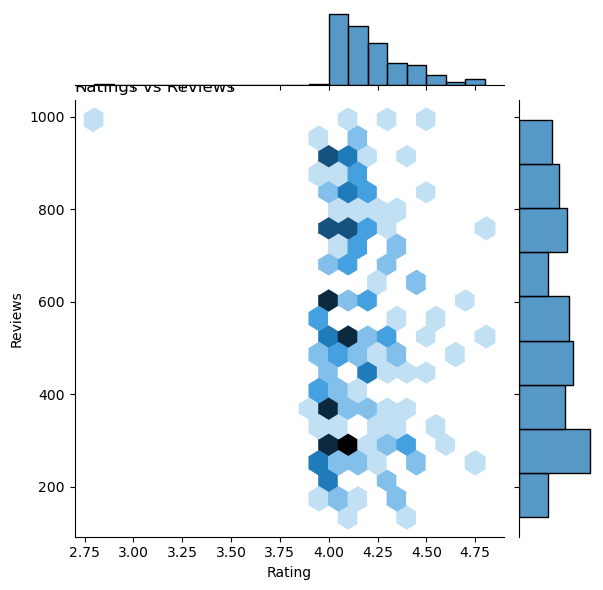

In [51]:
# Analyze the relationship between Ratings and Reviews
sns.jointplot(x='Rating', y='Reviews', data=df, kind='hex', gridsize=20)
plt.title('Ratings vs Reviews', loc='left')
plt.show()


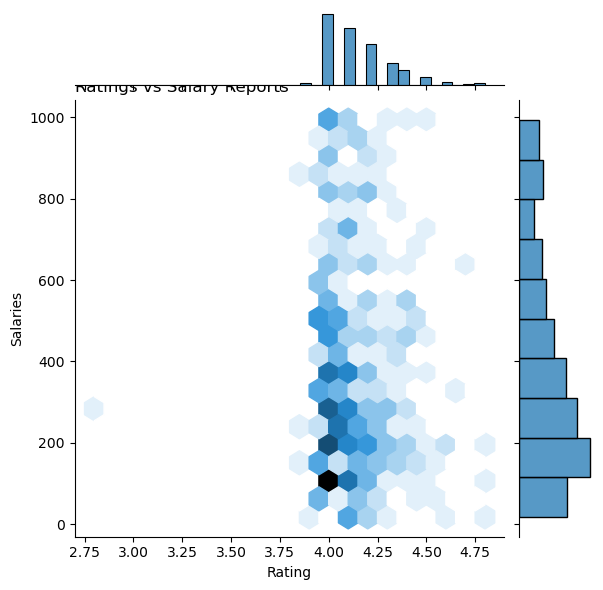

In [52]:
# Analyze the relationship between Ratings and Salaries
sns.jointplot(x='Rating', y='Salaries', data=df, kind='hex', gridsize=20)
plt.title('Ratings vs Salary Reports', loc='left')
plt.show()


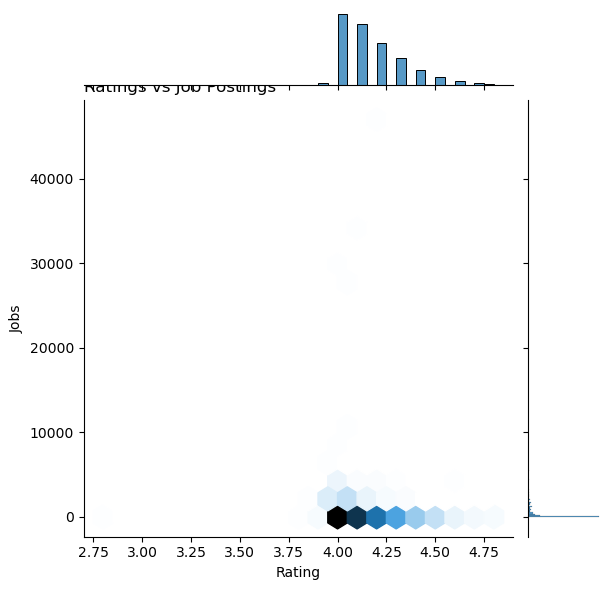

In [53]:
# Analyze the relationship between Ratings and Jobs
sns.jointplot(x='Rating', y='Jobs', data=df, kind='hex', gridsize=20)
plt.title('Ratings vs Job Postings', loc='left')
plt.show()


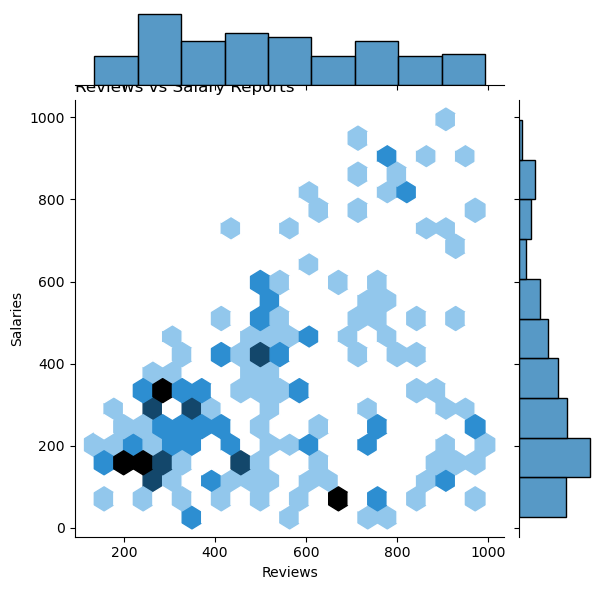

In [54]:
# Analyze the relationship between Reviews and Salaries
sns.jointplot(x='Reviews', y='Salaries', data=df, kind='hex', gridsize=20)
plt.title('Reviews vs Salary Reports', loc='left')
plt.show()


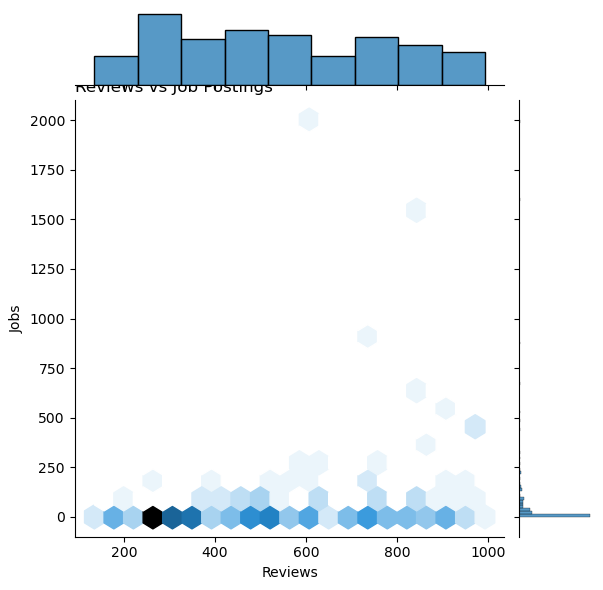

In [55]:
# Analyze the relationship between Reviews and Jobs
sns.jointplot(x='Reviews', y='Jobs', data=df, kind='hex', gridsize=20)
plt.title('Reviews vs Job Postings', loc='left')
plt.show()


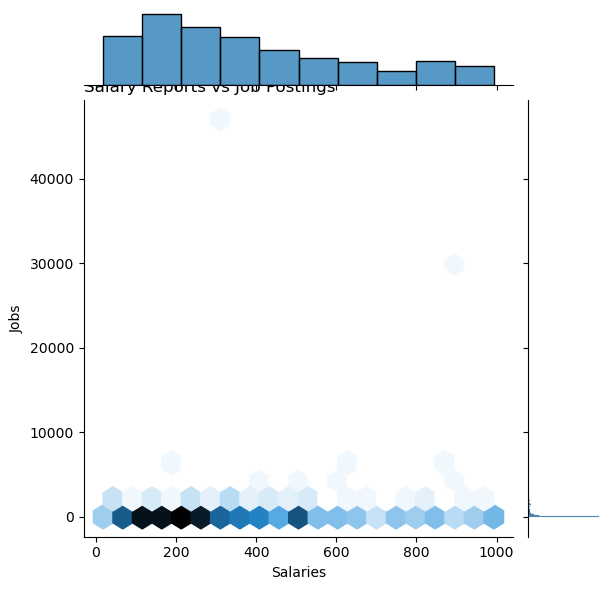

In [56]:
# Analyze the relationship between Salaries and Jobs
sns.jointplot(x='Salaries', y='Jobs', data=df, kind='hex', gridsize=20)
plt.title('Salary Reports vs Job Postings', loc='left')
plt.show()
